In [176]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sb
from numpy import linalg as LA
import math as math

In [79]:
df = pd.read_csv('student_admission_dataset.csv')
print(df.info())
print(df.head(5))

Student_GPA = np.array(df["GPA"])
Student_SAT = np.array(df["SAT_Score"])
Student_ECA = np.array(df["Extracurricular_Activities"])
Student_AdmissionStatus = np.array(df["Admission_Status"])
arr = np.array(df)
#Storing cateogorical Data (student admissions) as numerical Data in a different array:
Student_AdmissionStatus1 = Student_AdmissionStatus.copy()
for index, value in enumerate(Student_AdmissionStatus1): #A basic enumerate used to loop over the iterable array using an index which returns a tuple
    if value == "Rejected":
        Student_AdmissionStatus1[index] = int(0)
    elif value == "Waitlisted":
        Student_AdmissionStatus1[index] = int(1)
    elif value == "Accepted":
        Student_AdmissionStatus1[index] = int(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GPA                         250 non-null    float64
 1   SAT_Score                   250 non-null    int64  
 2   Extracurricular_Activities  250 non-null    int64  
 3   Admission_Status            250 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 7.9+ KB
None
    GPA  SAT_Score  Extracurricular_Activities Admission_Status
0  3.46       1223                           8         Rejected
1  2.54        974                           8         Rejected
2  2.91        909                           9         Rejected
3  2.83       1369                           5         Accepted
4  3.60       1536                           7         Accepted


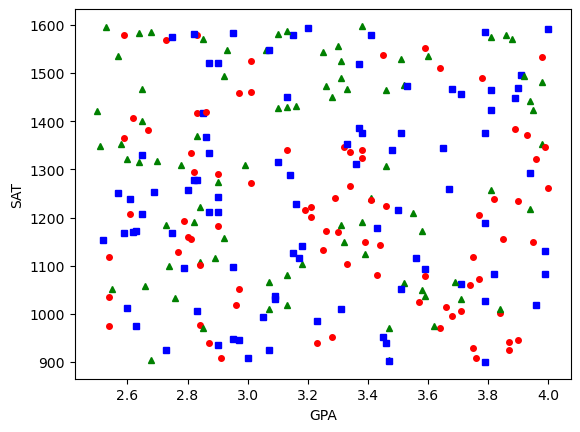

In [83]:
color = []
Student_AdmissionStatus2 = Student_AdmissionStatus1.copy()
for index, value in enumerate(Student_AdmissionStatus2):
    if value == 0:
        Student_AdmissionStatus2[index] = 'o'
        color.append('r')
    elif value == 1:
        Student_AdmissionStatus2[index] = 's'
        color.append('b')
    elif value == 2:
        Student_AdmissionStatus2[index] = '^'
        color.append('g')

for i in range (len(Student_AdmissionStatus2)):
    plt.plot(Student_GPA[i], Student_SAT[i], marker = Student_AdmissionStatus2[i], color= color[i], ms=4)

plt.xlabel("GPA")
plt.ylabel("SAT")
plt.show()

Mean of rejected students:  [3.297654320987654 1208.7654320987654]
Mean of waitlisted students: [3.227386363636363 1238.8636363636363]
Mean of accepted students:  [3.190864197530864 1304.6666666666667]


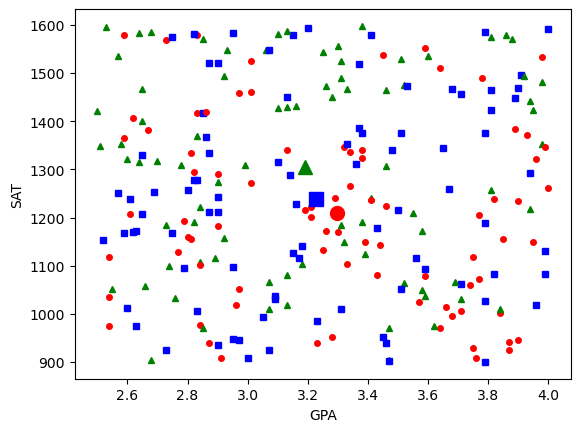

In [87]:
#using the technique of filtering to create three separate arrays that contain the data values of the three classes
filter_arr = [] #empty list that will store true or false values depending on whether rejected or not
for i in range (len(arr)):
    if arr[i, 3] == "Rejected":
        filter_arr.append(True)
    else:
        filter_arr.append(False)
rejectedArr = arr[filter_arr] # filtering by using the filtered list where each position of the list is either true or false. out of 250 data points, only the true values will be used inserted into the array
rejectedArr1 = np.array(rejectedArr[:,:2]) #creating another array to store the first two values only
print("Mean of rejected students: ",rejectedArr1.mean(axis = 0)) #calculating the mean along each axes
meanRej = rejectedArr1.mean(axis = 0) #store it in an array

filter_arr = []
for i in range (len(arr)):
    if arr[i, 3] == "Waitlisted":
        filter_arr.append(True)
    else:
        filter_arr.append(False)
waitlistedArr = arr[filter_arr]
waitlistedArr1 = np.array(waitlistedArr[:,:2])
print("Mean of waitlisted students:", waitlistedArr1.mean(axis = 0))
meanWait = waitlistedArr1.mean(axis = 0)

filter_arr = []
for i in range (len(arr)):
    if arr[i, 3] == "Accepted":
        filter_arr.append(True)
    else:
        filter_arr.append(False)
acceptedArr = arr[filter_arr]
acceptedArr1 = np.array(acceptedArr[:,:2])
print("Mean of accepted students: ",acceptedArr1.mean(axis = 0))
meanAccept = acceptedArr1.mean(axis = 0)


for i in range (len(Student_AdmissionStatus2)):
    plt.plot(Student_GPA[i], Student_SAT[i], marker = Student_AdmissionStatus2[i], color= color[i], ms=4)

plt.plot(meanRej[0],meanRej[1],marker = 'o', color = 'r', ms = 10)
plt.plot(meanWait[0],meanWait[1],marker = 's', color = 'b', ms = 10)
plt.plot(meanAccept[0],meanAccept[1],marker = '^', color = 'g', ms = 10)
plt.xlabel("GPA")
plt.ylabel("SAT")
plt.show()

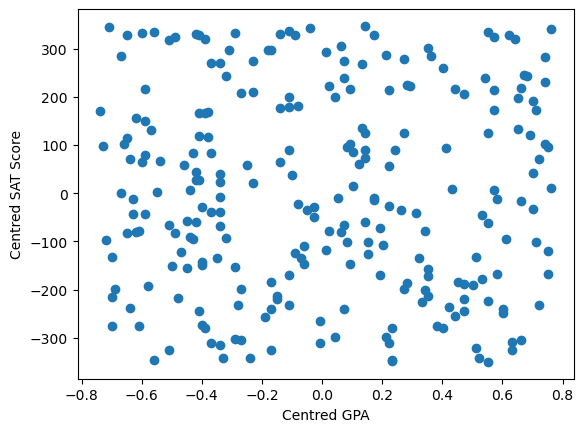

In [194]:
gpaV = Student_GPA.T
satV = Student_SAT.T
oneVector = np.ones((250,1))
centredData = np.zeros((2,250))

centredData[0] = gpaV - (oneVector@np.array([Student_GPA.mean()]))
centredData[1] = satV - (oneVector@np.array([Student_SAT.mean()]))


plt.scatter(centredData[0], centredData[1], marker = 'o')
plt.xlabel("Centred GPA")
plt.ylabel("Centred SAT Score")
plt.show()


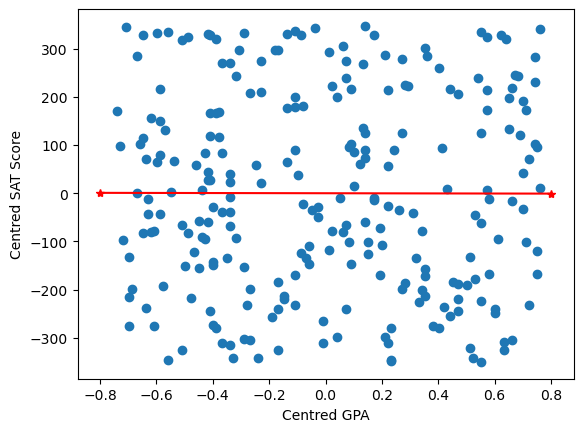

In [196]:
plt.scatter(centredData[0], centredData[1], marker = 'o')
plt.plot([-0.8,0.8],[0.8,-0.8], marker = "*", color = 'r')
plt.xlabel("Centred GPA")
plt.ylabel("Centred SAT Score")
plt.show()

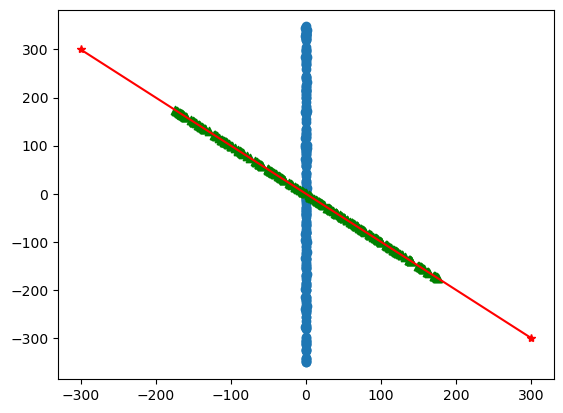

In [99]:
plt.scatter(centredData[0], centredData[1], marker = 'o')
plt.plot([-300,300],[300,-300], marker = "*", color = 'r')

u = np.vstack((centredData[0],centredData[1]))
l = np.array([[1.75],[-1.75]])
projection1 = np.array(((l.T.dot(u))/(l.T.dot(l)))*l)
plt.scatter(projection1[0],projection1[1], marker = '^', color = 'g')
plt.xlabel("Centred GPA")
plt.ylabel("Centred SAT Score")
plt.show()

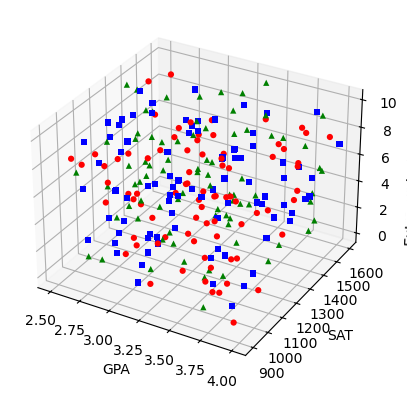

In [101]:
fig = plt.figure()
ax = plt.axes(projection='3d')
#scatter_surface = ax.scatter(Student_GPA,Student_SAT,Student_ECA, cmap='viridis', edgecolor='none')
for i in range (len(Student_AdmissionStatus2)):
    scatter_surface = ax.scatter(Student_GPA[i], Student_SAT[i], Student_ECA[i], marker= Student_AdmissionStatus2[i], color = color[i], edgecolors= 'none')
ax.set_xlabel('GPA')
ax.set_ylabel('SAT')
ax.set_zlabel('Extracurricular Activities')
plt.show()

Mean of rejected students:  [3.297654320987654 1208.7654320987654 5.234567901234568]
Mean of waitlisted students: [3.227386363636363 1238.8636363636363 5.340909090909091]
Mean of accepted students:  [3.190864197530864 1304.6666666666667 5.0246913580246915]


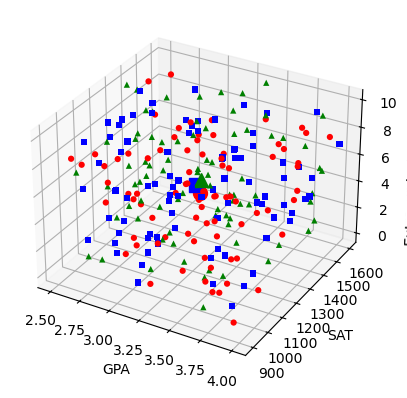

In [105]:
#using the technique of filtering to create three separate arrays that contain the data values of the three classes
filter_arr = [] #empty list that will store true or false values depending on whether rejected or not
for i in range (len(arr)):
    if arr[i, 3] == "Rejected":
        filter_arr.append(True)
    else:
        filter_arr.append(False)
rejectedArr = arr[filter_arr] # filtering by using the filtered list where each position of the list is either true or false. out of 250 data points, only the true values will be used inserted into the array
rejectedArr1 = np.array(rejectedArr[:,:3]) #creating another array to store the first two values only
print("Mean of rejected students: ",rejectedArr1.mean(axis = 0)) #calculating the mean along each axes
meanRej = rejectedArr1.mean(axis = 0) #store it in an array

filter_arr = []
for i in range (len(arr)):
    if arr[i, 3] == "Waitlisted":
        filter_arr.append(True)
    else:
        filter_arr.append(False)
waitlistedArr = arr[filter_arr]
waitlistedArr1 = np.array(waitlistedArr[:,:3])
print("Mean of waitlisted students:", waitlistedArr1.mean(axis = 0))
meanWait = waitlistedArr1.mean(axis = 0)

filter_arr = []
for i in range (len(arr)):
    if arr[i, 3] == "Accepted":
        filter_arr.append(True)
    else:
        filter_arr.append(False)
acceptedArr = arr[filter_arr]
acceptedArr1 = np.array(acceptedArr[:,:3])
print("Mean of accepted students: ",acceptedArr1.mean(axis = 0))
meanAccept = acceptedArr1.mean(axis = 0)

fig = plt.figure()
ax = plt.axes(projection='3d')

#scatter_surface = ax.scatter(Student_GPA,Student_SAT,Student_ECA, cmap='viridis', edgecolor='none')
for i in range (len(Student_AdmissionStatus2)):
    scatter_surface = ax.scatter(Student_GPA[i], Student_SAT[i], Student_ECA[i], marker= Student_AdmissionStatus2[i], color = color[i], edgecolors= 'none')

scatter_surface = ax.plot(meanRej[0],meanRej[1],meanRej[2], marker='o', color = 'r', ms = 10)
scatter_surface = ax.plot(meanWait[0],meanWait[1],meanWait[2], marker='s', color = 'b', ms = 10)
scatter_surface = ax.plot(meanAccept[0],meanAccept[1],meanAccept[2], marker='^', color = 'g', ms = 10)
ax.set_xlabel('GPA')
ax.set_ylabel('SAT')
ax.set_zlabel('Extracurricular Activities')
plt.show()

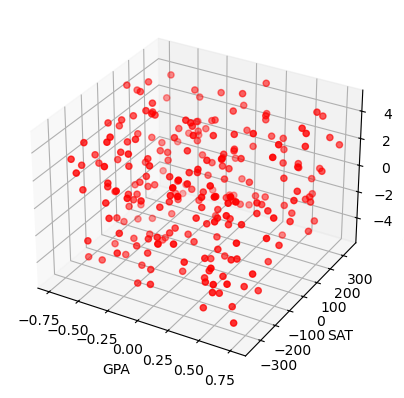

In [198]:
oneVector = np.ones((250,1))
centredData = np.zeros((3,250))

centredData[0] = Student_GPA.T - (oneVector@np.array([Student_GPA.mean()]))
centredData[1] = Student_SAT.T - (oneVector@np.array([Student_SAT.mean()]))
centredData[2] = Student_ECA.T - (oneVector@np.array([Student_ECA.mean()]))

fig = plt.figure()
ax = plt.axes(projection = "3d")
scatter = ax.scatter(centredData[0],centredData[1],centredData[2], color = 'r')
ax.set_xlabel('GPA')
ax.set_ylabel('SAT')
ax.set_zlabel('Extracurricular Activities')
plt.show()

Normal vector: [-1  2  5]


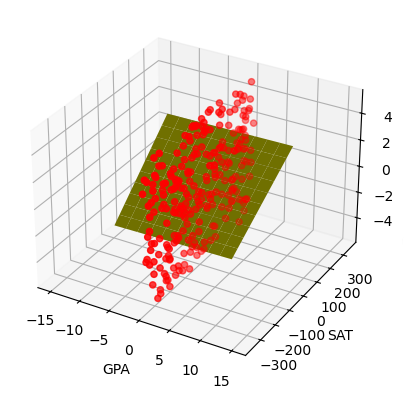

In [124]:
oneVector = np.ones((250,1))
centredData = np.zeros((3,250))

centredData[0] = Student_GPA.T - (oneVector@np.array([Student_GPA.mean()]))
centredData[1] = Student_SAT.T - (oneVector@np.array([Student_SAT.mean()]))
centredData[2] = Student_ECA.T - (oneVector@np.array([Student_ECA.mean()]))

fig = plt.figure()
ax = plt.axes(projection = "3d")
scatter = ax.scatter(centredData[0],centredData[1],centredData[2], color = 'r')
ax.set_xlabel('GPA')
ax.set_ylabel('SAT')
ax.set_zlabel('Extracurricular Activities')

a = np.array([1, -2, 1])
b = np.array([2, 1, 0])

# Compute the normal vector by taking the cross product of a and b
normal_vector = np.cross(a, b)
print(f"Normal vector: {normal_vector}")

# Generate points on the plane using linear combinations of a and b
points = []
for s in range(-5, 6):
    for t in range(-5, 6):
        point = s * a + t * b
        points.append(point)

points = np.array(points)

# Extract the x, y, and z coordinates of the points
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

# Reshape the points for surface plotting
X = x.reshape((11, 11))
Y = y.reshape((11, 11))
Z = z.reshape((11, 11))

# Plot the plane
surface = ax.plot_surface(X, Y, Z, color='y', edgecolor='none')
plt.show()

dot product of a and b is:  0
Shape of a and b is:  (3,) (3,)
Normal vector: [-1  2  5]
The shape of u:  (250, 3)
The shape of the normal vector: (3,)
Dimension of normal vector:  1
Shape of a and b is:  (3, 1) (3, 1)
(250, 3)


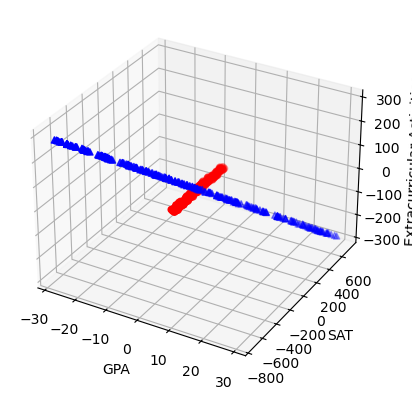

In [204]:
oneVector = np.ones((250,1))
centredData = np.zeros((3,250))

centredData[0] = Student_GPA.T - (oneVector@np.array([Student_GPA.mean()]))
centredData[1] = Student_SAT.T - (oneVector@np.array([Student_SAT.mean()]))
centredData[2] = Student_ECA.T - (oneVector@np.array([Student_ECA.mean()]))

fig = plt.figure()
ax = plt.axes(projection = "3d")
scatter = ax.scatter(centredData[0],centredData[1],centredData[2], color = 'r')
ax.set_xlabel('GPA')
ax.set_ylabel('SAT')
ax.set_zlabel('Extracurricular Activities')

a = np.array([1, -2, 1])
b = np.array([2, 1, 0])
print("dot product of a and b is: " , a.dot(b))
print("Shape of a and b is: ", a.shape, b.shape)
# Compute the normal vector by taking the cross product of a and b
normal_vector = np.cross(a, b)
print(f"Normal vector: {normal_vector}")

# Generate points on the plane using linear combinations of a and b
points = []
for s in range(-5, 6):
    for t in range(-5, 6):
        point = s * a + t * b
        points.append(point)

points = np.array(points)

# Extract the x, y, and z coordinates of the points
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

# Reshape the points for surface plotting
X = x.reshape((11, 11))
Y = y.reshape((11, 11))
Z = z.reshape((11, 11))

# Plot the plane
surface = ax.plot_surface(X, Y, Z, color='y', edgecolor='none')

u = np.array(centredData).T
print("The shape of u: ",u.shape)
print("The shape of the normal vector:", normal_vector.shape)
print("Dimension of normal vector: ", normal_vector.ndim)

""""normal0 = np.array(((u.T.dot(normal_vector))/(normal_vector.T.dot(normal_vector))))
normal_vector = np.array([[-1], [2], [5]])
print("Shape of normal Vector: ", normal_vector.shape)
print("normal0 shape: ", normal0.shape)
normal0 = np.array([normal0[:]])
print("Normal 0 shape: ", normal0.shape)
normal = (normal0.T)*(normal_vector.T)
projection = np.array(u - normal.T)
print("Shape of projecton:", projection.shape)
print("Projection 0 is:", projection[0])"""

"""normal_vector = np.array([normal_vector])
print("new shape of normal vector is: ", normal_vector.shape)
projection_normal = ((u@normal_vector.T)/normal_vector.dot(normal_vector.T))@normal_vector
print("The shape of projection_normal is:", projection_normal.shape)
projection = u - projection_normal
scatter = ax.scatter(projection[:,0], projection[:,1], projection[:,2], color = 'b', marker = '^')
"""

a = np.array([a]).T
b = np.array([b]).T
print("Shape of a and b is: ", a.shape, b.shape)
projection = ((u@a)/(LA.norm(a)))@a.T + ((u@b)/LA.norm(b))@b.T
print(projection.shape)
scatter = ax.scatter(projection[:,0], projection[:,1], projection[:,2], color = 'b', marker = '^')
plt.show()

In [154]:
df = pd.read_csv('seeds_dataset.csv')
print(df.info)
df.drop(columns='7', inplace=True)
df.drop(columns='8', inplace=True)
df.drop(columns='9', inplace=True)
print(df.head(5))
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
arr = np.array(df)
print(arr.shape)

<bound method DataFrame.info of          0      1       2      3      4      5      6    7   8   9
0    15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1.0 NaN NaN
1    14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1.0 NaN NaN
2    14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1.0 NaN NaN
3    13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1.0 NaN NaN
4    16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1.0 NaN NaN
..     ...    ...     ...    ...    ...    ...    ...  ...  ..  ..
205  12.19  13.20  0.8783  5.137  2.981  3.631  4.870  3.0 NaN NaN
206  11.23  12.88  0.8511  5.140  2.795  4.325  5.003  3.0 NaN NaN
207  13.20  13.66  0.8883  5.236  3.232  8.315  5.056  3.0 NaN NaN
208  11.84  13.21  0.8521  5.175  2.836  3.598  5.044  3.0 NaN NaN
209  12.30  13.34  0.8684  5.243  2.974  5.637  5.063  3.0 NaN NaN

[210 rows x 10 columns]>
       0      1       2      3      4      5      6
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220
1  14.88  14.57  0.8811  5.554  3.

In [170]:
v = np.array([[arr[:,0].mean()], [arr[:, 1].mean()], [arr[:,2].mean()], [arr[:,3].mean()], [arr[:,4].mean()], [arr[:,5].mean()], [arr[:,6].mean()]])
print(v)
print(v.shape)
u = np.array([np.mean(arr, axis=0)])
u = u.T
print(u)
print(u.shape)
print("The two means are the same: ", np.allclose(v,u))

[[14.90650246]
 [14.58871921]
 [ 0.87093005]
 [ 5.64029064]
 [ 3.26430542]
 [ 3.71042463]
 [ 5.41975369]]
(7, 1)
[[14.90650246]
 [14.58871921]
 [ 0.87093005]
 [ 5.64029064]
 [ 3.26430542]
 [ 3.71042463]
 [ 5.41975369]]
(7, 1)
The two means are the same:  True


In [172]:
#inner product
oneVector = np.ones((203,1))
centredArr = np.subtract(arr, oneVector@u.T)
print("The number of rows/observations are: ", centredArr.shape[0], " and the number of columns are: ", centredArr.shape[1])
covarianceMatrix = np.array((centredArr.T@centredArr)/(centredArr.shape[0]))
print("First Covariance Matrix:", covarianceMatrix)

#outer product
covarianceMatrix1 = np.zeros((centredArr.shape[1], centredArr.shape[1]))
for i in range(centredArr.shape[0]):
    covarianceMatrix1 += np.outer(centredArr[i],centredArr[i])
covarianceMatrix1 /= (centredArr.shape[0])


print("Second Covariance Matrix:", covarianceMatrix1)
print("Actual Covariance Matrix: ", np.cov(arr, rowvar=False))
print("The two calculated Covariance Matrices are equal: ", np.allclose(covarianceMatrix,covarianceMatrix1))
print("The first covariance matrix is correct: ", np.allclose(covarianceMatrix, np.cov(arr, rowvar=False)))
print("The second covariance matrix is correct: ", np.allclose(covarianceMatrix1, np.cov(arr, rowvar=False)))

The number of rows/observations are:  203  and the number of columns are:  7
First Covariance Matrix: [[ 8.48355082e+00  3.78459503e+00  4.15153416e-02  1.22665944e+00
   1.06790777e+00 -1.00692161e+00  1.23822071e+00]
 [ 3.78459503e+00  1.70728112e+00  1.62559498e-02  5.62781407e-01
   4.66543150e-01 -4.33775052e-01  5.72198749e-01]
 [ 4.15153416e-02  1.62559498e-02  5.41864072e-04  3.90205136e-03
   6.70764895e-03 -1.08879885e-02  2.70234878e-03]
 [ 1.22665944e+00  5.62781407e-01  3.90205136e-03  1.95784117e-01
   1.44372158e-01 -1.21764310e-01  2.02811948e-01]
 [ 1.06790777e+00  4.66543150e-01  6.70764895e-03  1.44372158e-01
   1.42495838e-01 -1.44031399e-01  1.39582425e-01]
 [-1.00692161e+00 -4.33775052e-01 -1.08879885e-02 -1.21764310e-01
  -1.44031399e-01  2.25223028e+00 -1.54370397e-02]
 [ 1.23822071e+00  5.72198749e-01  2.70234878e-03  2.02811948e-01
   1.39582425e-01 -1.54370397e-02  2.41597565e-01]]
Second Covariance Matrix: [[ 8.48355082e+00  3.78459503e+00  4.15153416e-02  1

In [186]:
#Pandas Correlations
print("Correlation Matrix:")
print(df.corr())
print()
#Computing cosine of attribute 1 and 2 in 203 dimensions:
attribute1 = np.array([arr[:, 0]]).T
attribute2 = np.array([arr[:, 1]]).T
Z1 = attribute1 - np.array([(np.ones((203,1))@np.array([np.mean(attribute1)]))]).T
Z2 = attribute2 - np.array([(np.ones((203,1))@np.array([np.mean(attribute2)]))]).T

"""
print("Shape of attribute 1: ", attribute1.shape)
print("Shape of attribute 2: ", attribute2.shape)
print("shape of one vector: ", np.ones((203,1)).shape)
print("Shape of mean: ", np.array([np.mean(attribute2)]).shape)
print("Shape of one*mean:", np.array([(np.ones((203,1))@np.array([np.mean(attribute2)]))]).T.shape)
print("Shape of centred vector Z: ", Z1.shape)
"""

norm1 = LA.norm(Z1)
#print(norm1)
norm2 = LA.norm(Z2)
#print(norm2)

correlation = (Z1/norm1).T @ (Z2/norm2)
print("The correlation/cosine(angle) between attribute1 and attribute2 is: ",correlation)


Correlation Matrix:
          0         1         2         3         4         5         6
0  1.000000  0.994439  0.612315  0.951802  0.971279 -0.230356  0.864894
1  0.994439  1.000000  0.534459  0.973416  0.945885 -0.221210  0.890939
2  0.612315  0.534459  1.000000  0.378843  0.763351 -0.311671  0.236184
3  0.951802  0.973416  0.378843  1.000000  0.864358 -0.183369  0.932521
4  0.971279  0.945885  0.763351  0.864358  1.000000 -0.254243  0.752287
5 -0.230356 -0.221210 -0.311671 -0.183369 -0.254243  1.000000 -0.020927
6  0.864894  0.890939  0.236184  0.932521  0.752287 -0.020927  1.000000

The correlation/cosine(angle) between attribute1 and attribute2 is:  [[0.9944388]]


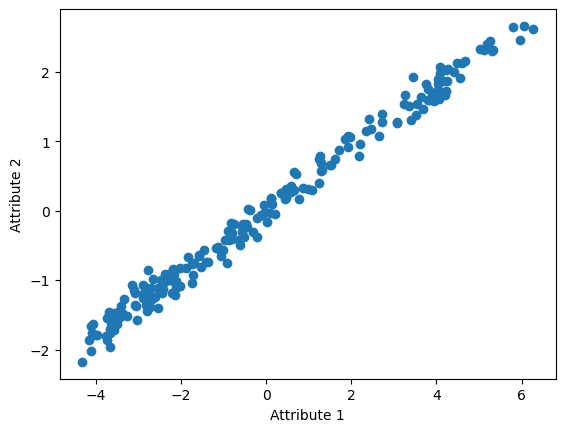

In [190]:
plt.scatter(Z1,Z2)
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()